# T-cell, Macrophage and type I interferon interaction

This notebook outlines the analysis presented in Supplmentary Discussion 1, generating Supplementary figures 19-21.

In [159]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import os
import os.path as osp

from glob import glob

In [188]:
PROP_PATHS = dict(ST_SCC = "../data/revision/props/T22_D1.tsv",
                 Visium_SCC = "../data/revision/props/VT19T26-101_V1_T20.tsv",
                 Visium_HER2 = "../data/revision/props/Visium_HER2.tsv",
               )

CORR_PATHS = dict(ST_SCC = "../data/revision/corrs/st-all.tsv",
                  Visium_SCC = "../data/revision/corrs/visium-all.tsv",
                  Visium_HER2 = "../data/revision/corrs/Visium_HER2.tsv",
                )

CELL_TYPES = dict(ST_SCC = ["Tcell","Mac"],
                  Visium_SCC = ["Tcell","Mac"],
                  Visium_HER2 = ["T-cells : IFIT1","Macrophage 2 :CXCL10"],
                 )

COUNT_PATHS = dict(ST_SCC = "../data/revision/counts/T22_D1.tsv.gz",
                   Visium_SCC = "../data/revision/counts/VT19T26-101_V1_T20.tsv.gz",
                   Visium_HER2 = "../data/revision/counts/Visium_HER2.tsv.gz",
                   )


MARKER_SIZE = dict(ST_SCC = 120,
                   Visium_SCC = 50,
                   Visium_HER2 = 50,
                   )

GO_PTH = "../data/go-sets/go-0060337.csv"



In [161]:
go_set = pd.read_csv(GO_PTH,
                    sep = ",",
                     header = 0,
                     index_col = 0,
                    )

go_set = go_set.name.values.tolist()


In [162]:
PROP["ST_SCC"].columns

Index(['ASDC', 'B Cell', 'CD1C', 'CLEC9A', 'Endothelial Cell', 'Epithelial',
       'Fibroblast', 'LC', 'MDSC', 'Mac', 'Melanocyte', 'Multiplet', 'NK',
       'PDC', 'Tcell'],
      dtype='object')

In [164]:
PROP = {name: pd.read_csv(path,
                          sep = "\t",
                          header = 0,
                          index_col =0)\
        for name,path in PROP_PATHS.items() }

CORR = {name: pd.read_csv(path,
                          sep = "\t",
                          header = 0,
                          index_col =0)\
        for name,path in CORR_PATHS.items() }



In [150]:
COUNTS = {name: pd.read_csv(path,
                          sep = "\t",
                          header = 0,
                          index_col =0)\
        for name,path in COUNT_PATHS.items() }

In [165]:
CORDS = dict()

for name in PROP.keys():
    inter = COUNTS[name].index.intersection(PROP[name].index)
    COUNTS[name] = COUNTS[name].loc[inter,:]
    PROP[name] = PROP[name].loc[inter,:]
    crd = np.array([x.split("x") for x in inter]).astype(float)
    CORDS[name] = crd

In [166]:
def get_mean(name : str, corr : pd.DataFrame):
    tmp = corr.loc[name,:]
    tmp = tmp.loc[[x for x in corr.columns if x.split(".")[0] == "mean"]]
    tmp.index = [".".join(x.split(".")[1::]).replace("."," ") for x in tmp.index]
    return tmp

In [7]:
n_sets = 3
n_types = 2

### Three part visualization
1. Joint Proportions
2. Type I interferon response
3. Combined

In [141]:
from utils import bean_plot
from spw_enr import get_enr

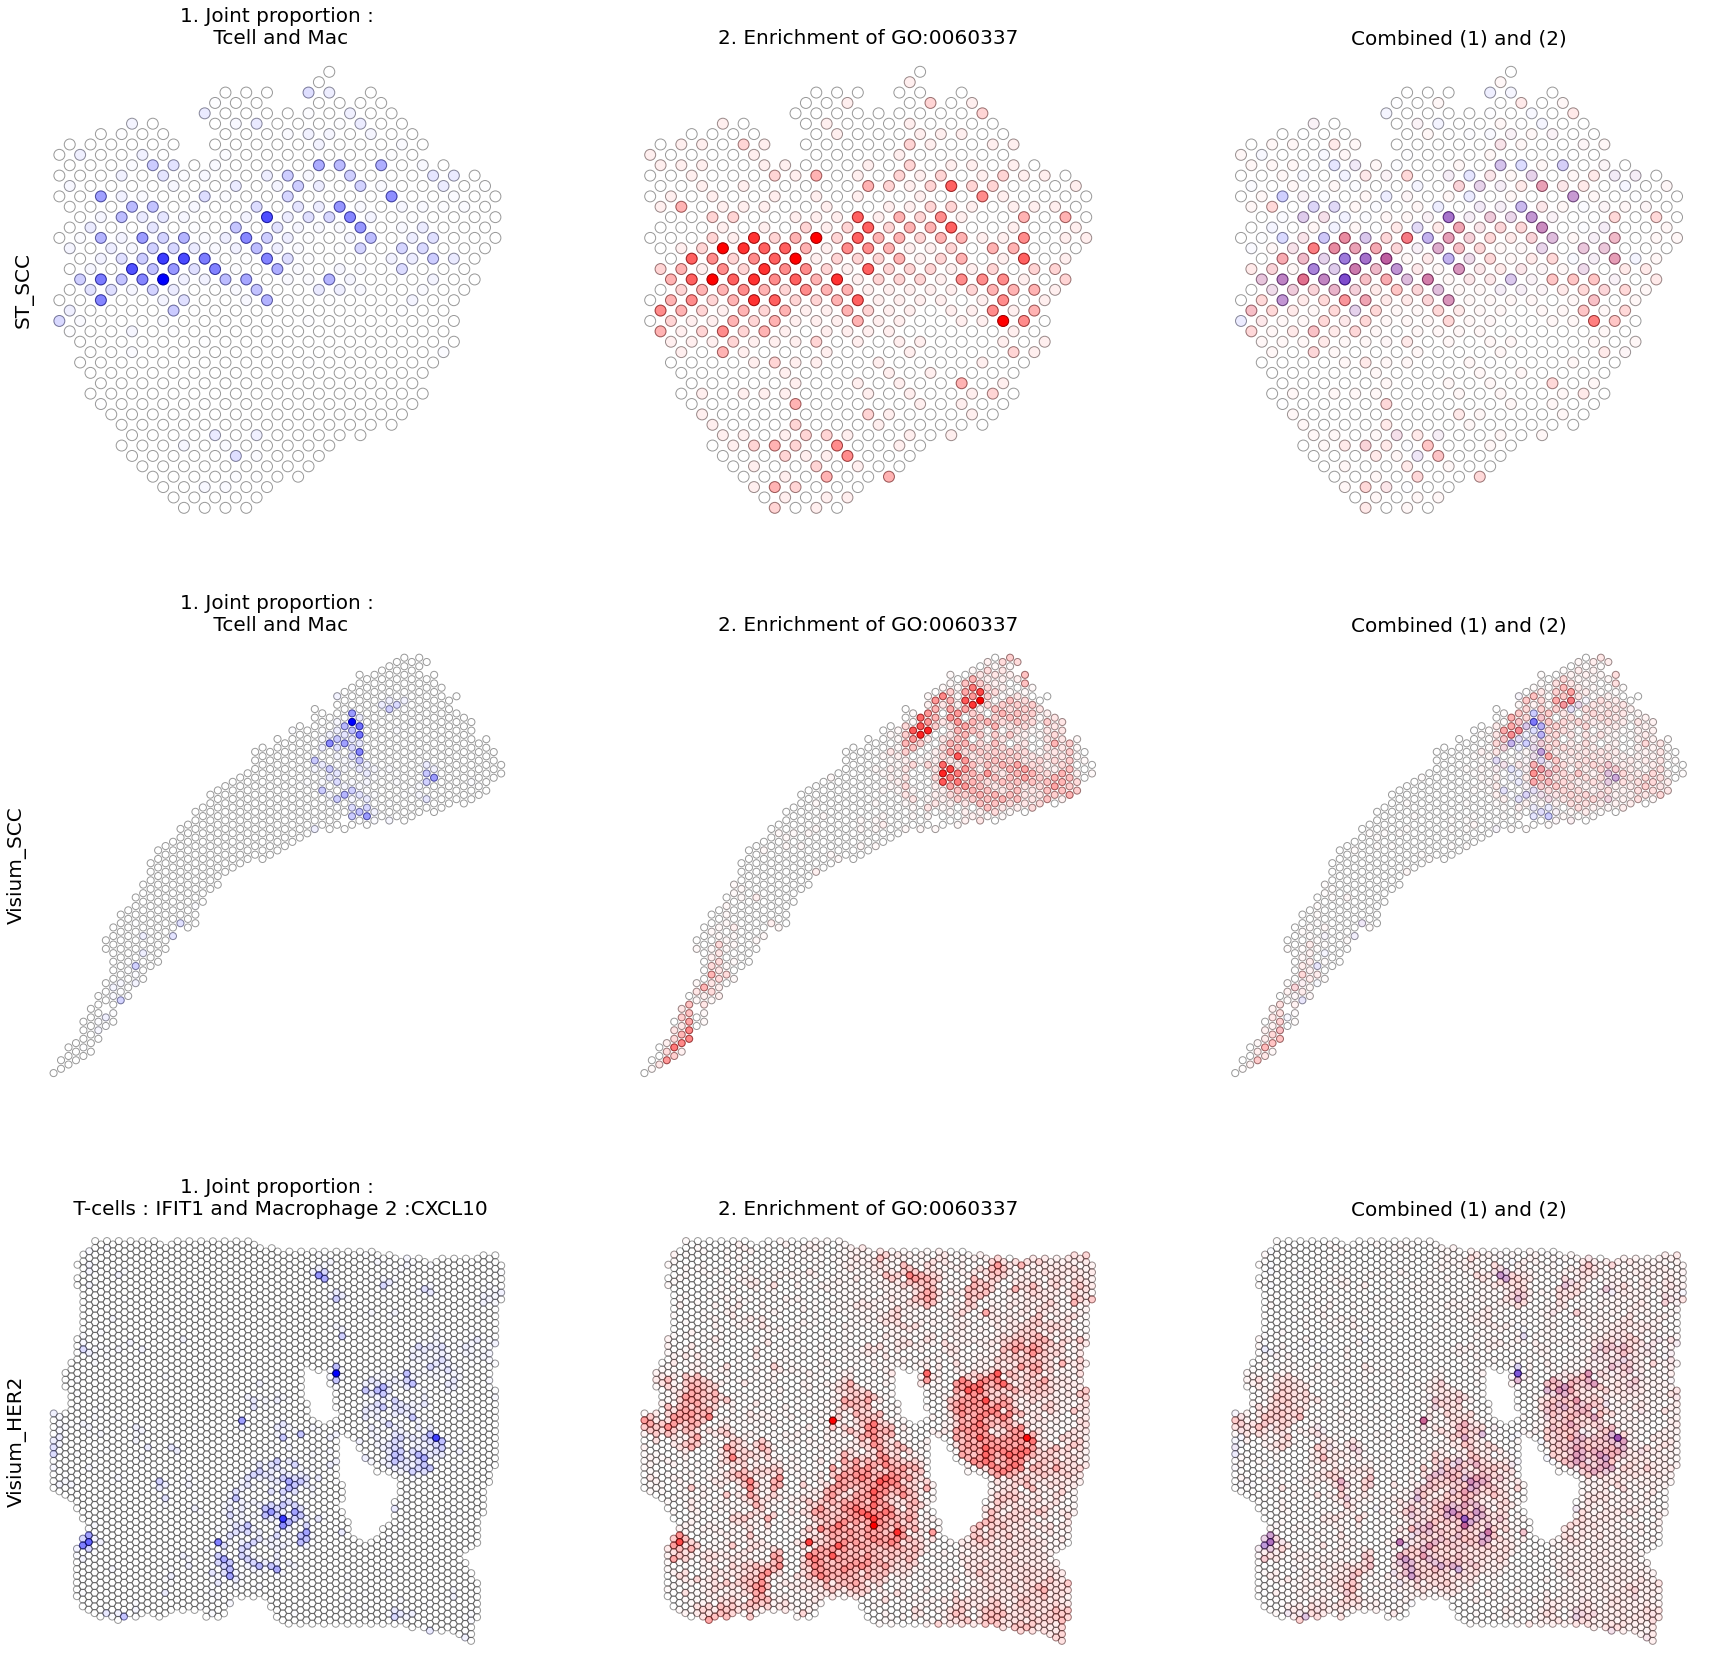

In [189]:
fig,ax = plt.subplots(3,3,figsize = (30,30),facecolor ="white")

for k,name in enumerate(PROP.keys()): 
    ct_1,ct_2 = CELL_TYPES[name]
    prp = PROP[name]
    cnt  = COUNTS[name]
    crd = CORDS[name]
    
    axx = ax[k,:]
    
    prod = prp[ct_1].values * prp[ct_2].values
    enr = get_enr(expr=cnt, comp=go_set,n_top=100)
    
    
    rgba_prop = np.zeros((prod.shape[0],4))
    rgba_prop[:,2] = 1
    rgba_prop[:,3] = prod / prod.max()

    rgba_enr = np.zeros(rgba_prop.shape)
    rgba_enr[:,0] = 1
    rgba_enr[:,3] = enr / enr.max()

    marker_size = MARKER_SIZE[name]
    titlesize = 20

    rgba_enr_half = rgba_enr.copy()
    rgba_enr_half[:,3] /= 2

    rgba_prop_half = rgba_prop.copy()
    rgba_prop_half[:,3] /= 2


    axx[0].scatter(crd[:,0],
               crd[:,1],
               c = rgba_prop,
               s = marker_size
              )

    axx[1].scatter(crd[:,0],
               crd[:,1],
               c = rgba_enr,
               s = marker_size
              )

    axx[2].scatter(crd[:,0],
               crd[:,1],
               c = rgba_enr_half,
               s = marker_size
              )

    axx[2].scatter(crd[:,0],
               crd[:,1],
               c = rgba_prop_half,
               s = marker_size
              )


    for aa in axx:
        aa.scatter(crd[:,0],
                   crd[:,1],
                   c = "none",
                   edgecolor = "black",
                   s = marker_size,
                   alpha = 0.4,
                  )

        aa.set_aspect("equal")
        aa.set_xticks([])
        aa.set_yticks([])


        for spine in aa.spines.values():
            spine.set_visible(False)

    axx[0].set_title("1. Joint proportion :\n {} and {}".format(ct_1,ct_2),fontsize = titlesize)
    axx[1].set_title("2. Enrichment of GO:0060337",fontsize = titlesize)
    axx[2].set_title("Combined (1) and (2)",fontsize = titlesize)
    axx[0].set_ylabel("{}".format(name),fontsize = 20)
    
plt.show()

## CORRS

'V'

/home/alma/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("seismic"))
  This is separate from the ipykernel package so we can avoid doing imports until
/home/alma/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


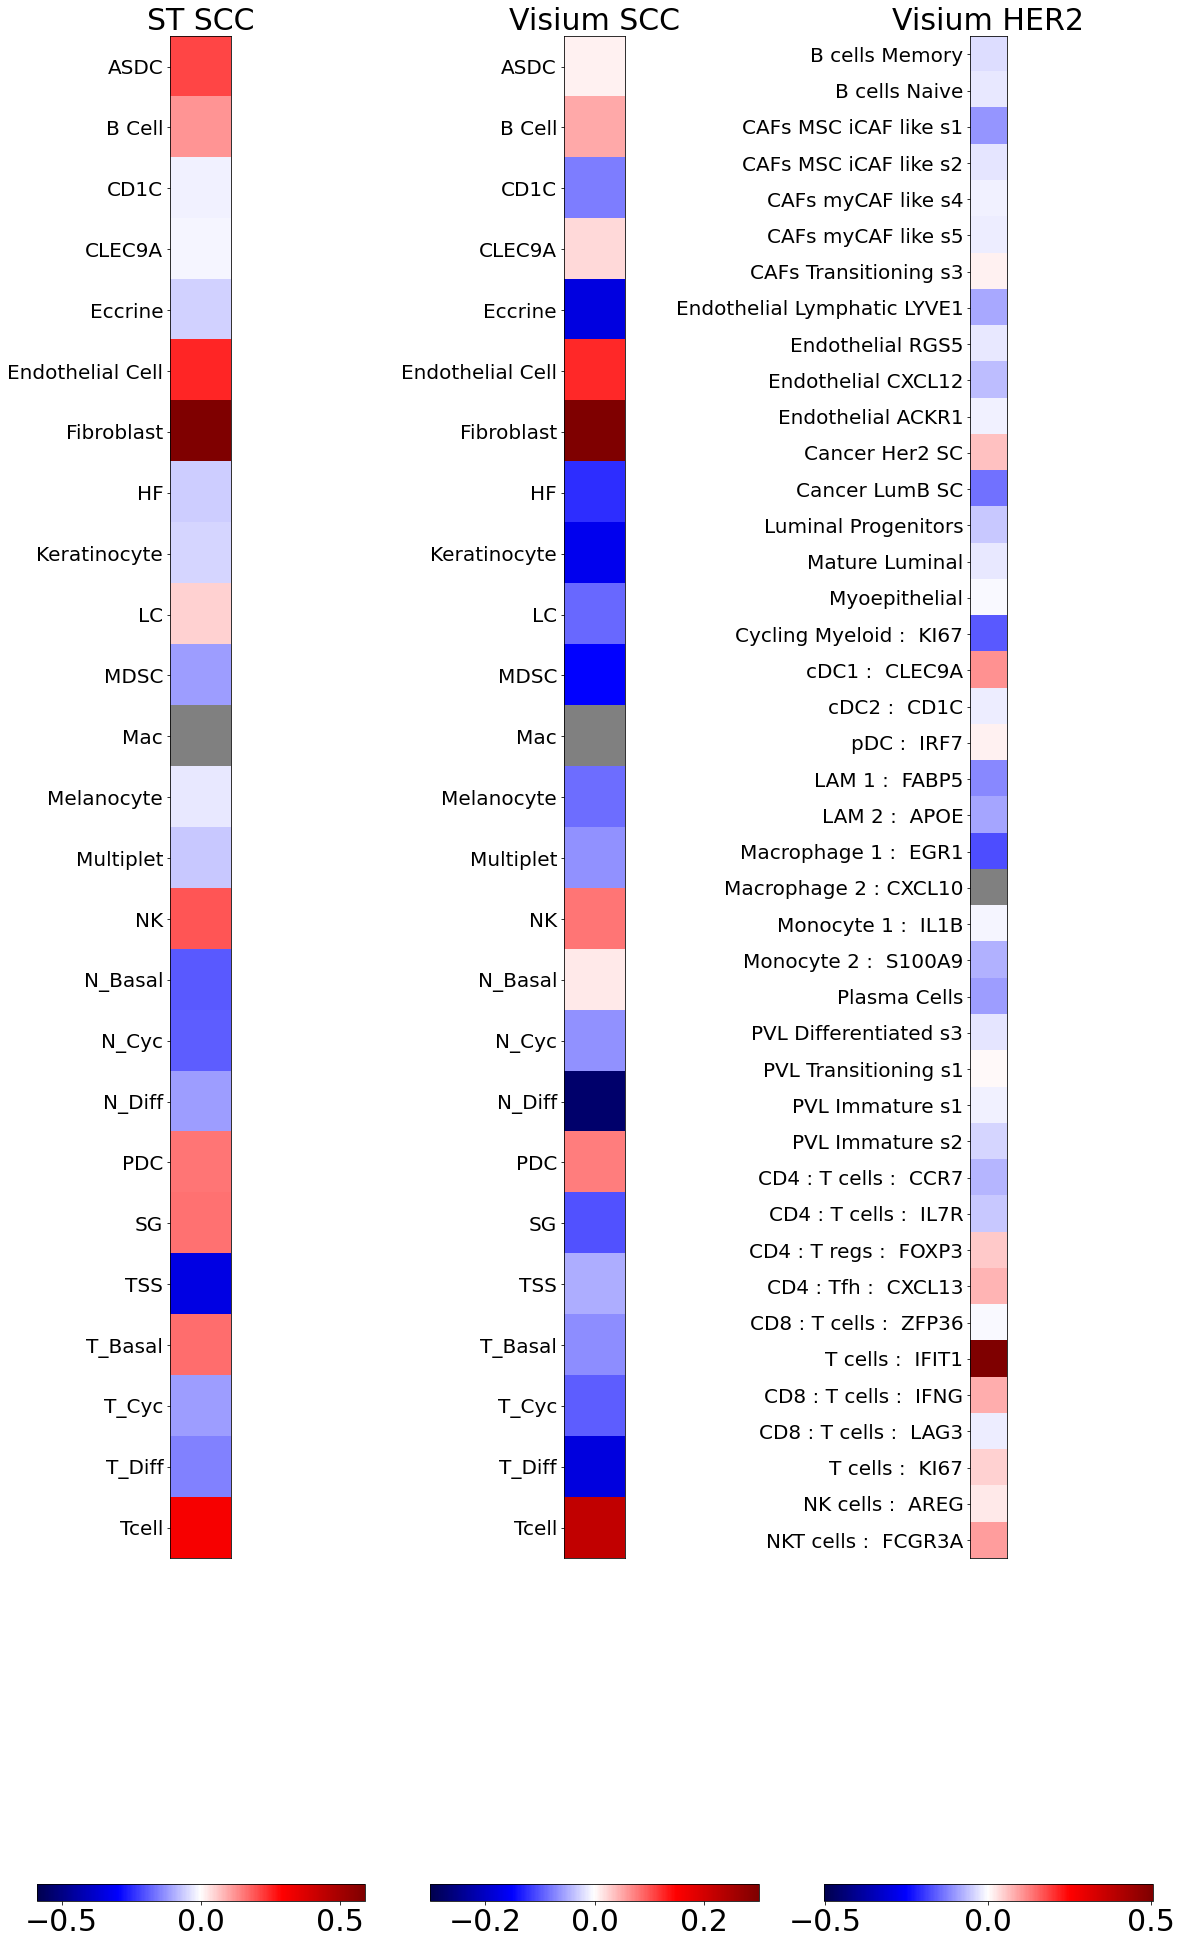

In [233]:
fig,ax = plt.subplots(1,3,figsize = (20,40),facecolor ="white")
cmap = plt.cm.seismic
cmap.set_bad('gray',1.)
max_vals = dict()
for k,name in enumerate(CORR.keys()):
    ct_mac = CELL_TYPES[name][1]
    _corr = get_mean(ct_mac,CORR[name])
    _corr[_corr.index == ct_mac.replace(":"," ") ] = np.nan
    max_val = np.max(np.abs(_corr))
    max_vals[name] = max_val
    im = ax[k].imshow(_corr[:,np.newaxis],cmap = cmap,vmin = -max_val ,vmax = max_val)
    ax[k].set_xticks([])
    ax[k].set_xticklabels([])
    ax[k].set_title(name.replace("_"," "),fontsize = 30)
    ax[k].set_yticks(np.arange(len(_corr)))
    ax[k].set_yticklabels([x.replace("  "," : ") for x in _corr.index.values],fontsize = 20)
    
    clbr = fig.colorbar(im, ax = ax[k],orientation='horizontal')
    clbr.ax.tick_params(labelsize=30) 

#fig.tight_layout()
plt.show()
    

### Per patient

In [170]:
patient_corrs = dict()

In [171]:
# Visium

SCC_VISIUM_CORRS = glob("../data/revision/corrs/patientwise/visium/*.tsv")
n_pat = len(SCC_VISIUM_CORRS)
_corrs = pd.Series(np.zeros((n_pat)),
                   index = [osp.basename(x).rstrip(".tsv")\
                            for x in SCC_VISIUM_CORRS])

for k,c_path in enumerate(SCC_VISIUM_CORRS):
    ct_tcell = CELL_TYPES["Visium_SCC"][0]
    ct_mac = CELL_TYPES["Visium_SCC"][1]
    tmp = pd.read_csv(c_path,sep = "\t",header = 0,index_col = 0)
    tmp = get_mean(ct_mac,tmp)
    _corrs[k] = tmp[tmp.index.values == ct_tcell]

    
patient_corrs["Visium_SCC"] = _corrs

In [172]:
patient_corrs

{'Visium_SCC': s12-corr-table    0.462294
 s34-corr-table    0.174977
 dtype: float64}

In [173]:
# ST

SCC_VISIUM_CORRS = glob("../data/revision/corrs/patientwise/st/*.tsv")
n_pat = len(SCC_VISIUM_CORRS)
_corrs = pd.Series(np.zeros((n_pat)),
                   index = [osp.basename(x).rstrip(".tsv")\
                            for x in SCC_VISIUM_CORRS])

for k,c_path in enumerate(SCC_VISIUM_CORRS):
    ct_tcell = CELL_TYPES["ST_SCC"][0]
    ct_mac = CELL_TYPES["ST_SCC"][1]
    tmp = pd.read_csv(c_path,sep = "\t",header = 0,index_col = 0)
    tmp = get_mean(ct_mac,tmp)
    _corrs[k] = tmp[tmp.index.values == ct_tcell]

patient_corrs["ST_SCC"] = _corrs

/home/alma/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


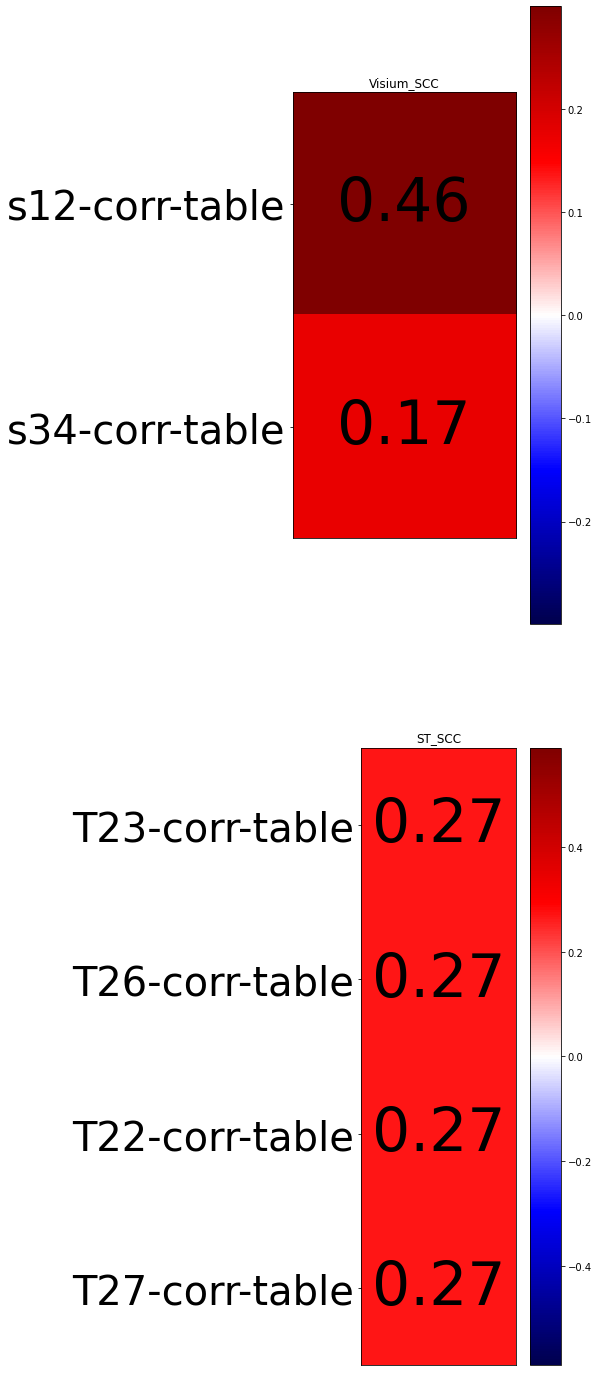

In [216]:
fig,ax = plt.subplots(2,1,facecolor = "white",figsize = (5,25))

for k,(name,_corr) in enumerate(patient_corrs.items()):
    im = ax[k].imshow(_corr[:,np.newaxis],
                      cmap = cmap,
                      vmin = -max_vals[name],
                      vmax = max_vals[name],
                     )
    ax[k].set_xticks([])
    ax[k].set_xticklabels([])
    ax[k].set_title(name)
    ax[k].set_yticks(np.arange(len(_corr)))
    ax[k].set_yticklabels(_corr.index,fontsize = 40)
    ypos = ax[k].get_yticks()
    ax[k].grid(which='minor', color='k', linestyle='-', linewidth=10)
    for v,y in zip(_corr,ypos):
        ax[k].text(s="{:0.2f}".format(v),
                   x = 0,
                   y=y,
                   ha = "center",
                   fontsize = 60,
                   va = "center")
    
    fig.colorbar(im, ax = ax[k],orientation='vertical')

## Visualize Proportions

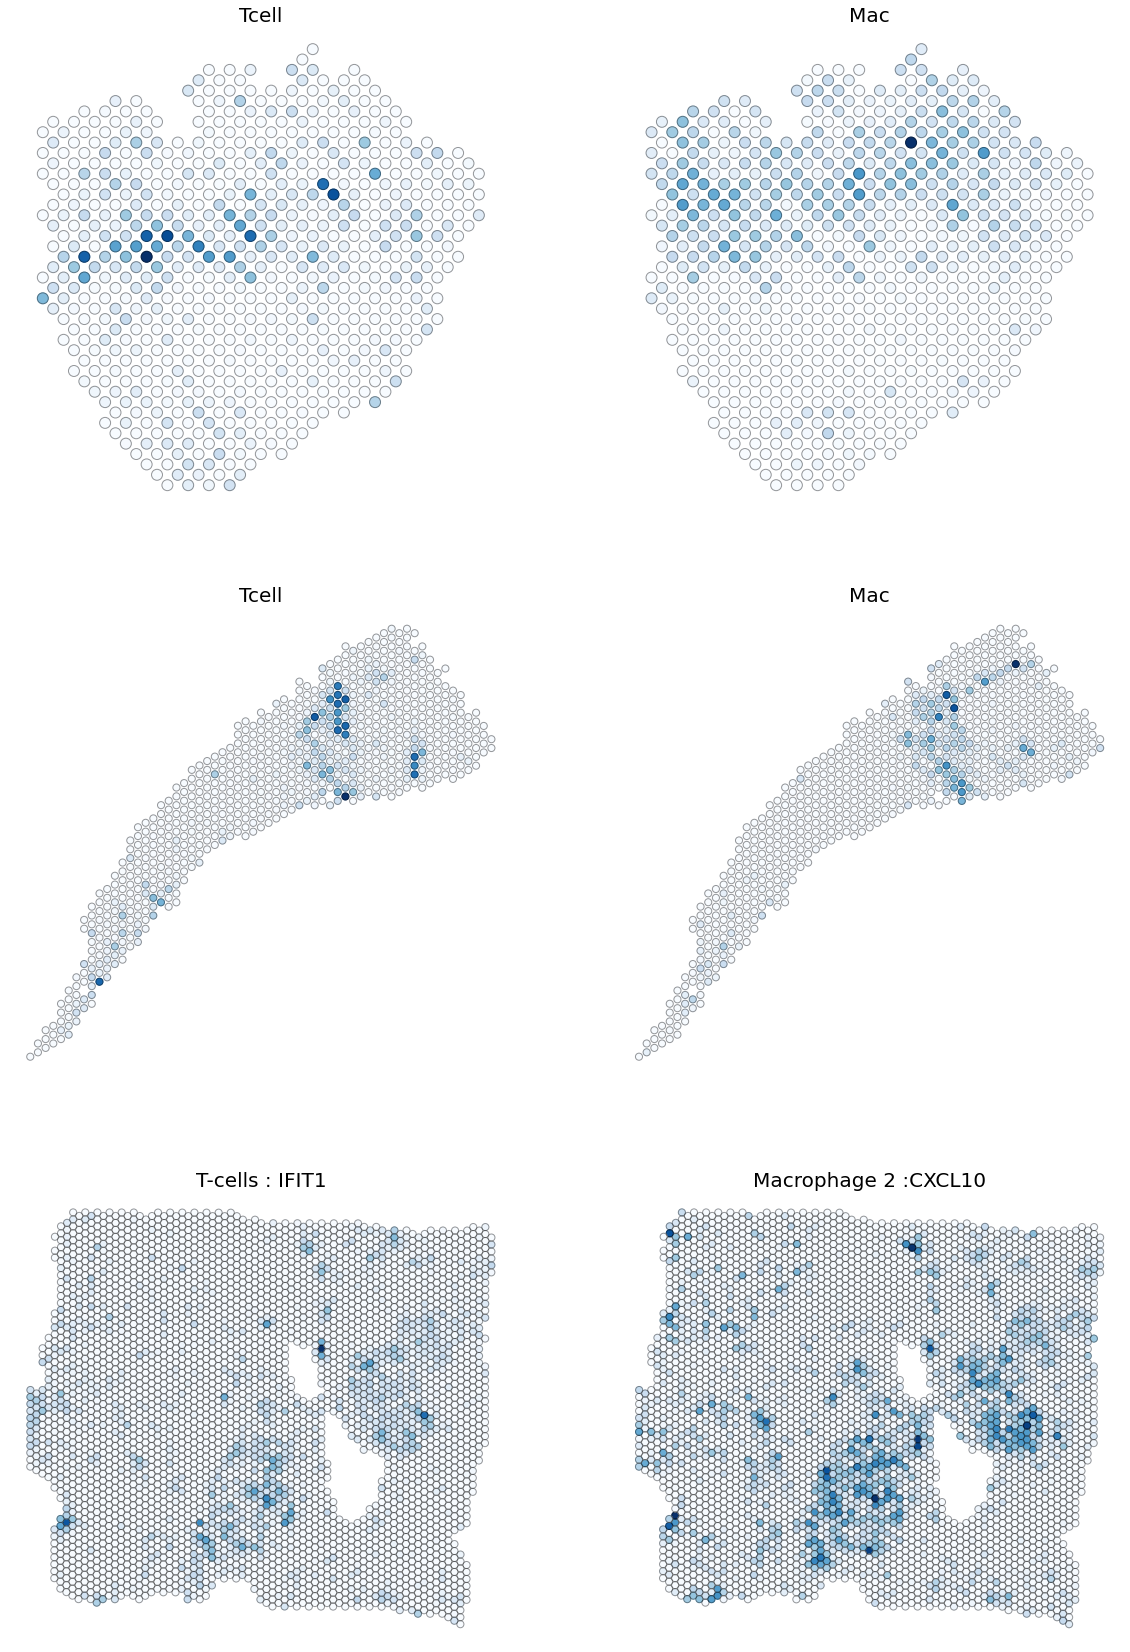

In [190]:

fig,ax = plt.subplots(3,2,figsize = (20,30),facecolor = "white")

for k,name in enumerate(PROP.keys()):
    
    ct_1,ct_2 = CELL_TYPES[name]
    prp = PROP[name]
    crd = CORDS[name]
    
    marker_size = MARKER_SIZE[name]
    
    axx = ax[k,:]
    
    prop_mac = prp[ct_2].values
    prop_mac /= prop_mac.max()
    
    prop_tcell = prp[ct_1].values
    prop_tcell /= prop_tcell.max()
    
    for ii,prop_type in enumerate([prop_tcell,prop_mac]):
        axx[ii].scatter(crd[:,0],
                       crd[:,1],
                       c = prop_type,
                       s = marker_size,
                        cmap = plt.cm.Blues,
                      )
        
    axx[0].set_title(ct_1,fontsize = 20)
    axx[1].set_title(ct_2, fontsize =20)


    for aa in axx:
        aa.scatter(crd[:,0],
                   crd[:,1],
                   c = "none",
                   edgecolor = "black",
                   s = marker_size,
                   alpha = 0.4,
                  )

        aa.set_aspect("equal")
        aa.set_xticks([])
        aa.set_yticks([])


        for spine in aa.spines.values():
            spine.set_visible(False)